## Однофакторный дисперсионный анализ

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../resources/genetherapy.csv")

In [3]:
df.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [4]:
df.count()

expr       60
Therapy    60
dtype: int64

In [5]:
df.dtypes

expr        int64
Therapy    object
dtype: object

In [6]:
df.describe()

,expr
count,60.000000
mean,96.316667
std,5.619252
min,84.000000
25%,93.000000
50%,96.000000
75%,100.000000
max,107.000000


In [33]:
A = df[df["Therapy"] == "A"]["expr"]
B = df[df["Therapy"] == "B"]["expr"]
C = df[df["Therapy"] == "C"]["expr"]
D = df[df["Therapy"] == "D"]["expr"]
st.f_oneway(A, B, C, D)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [8]:
samples = [list(frame) for group, frame in df.groupby('Therapy')['expr']]
st.f_oneway(*samples)
# звёздочка означает, что передаём содержимое списка как набор аргументов (иначе был бы один аргумент список)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

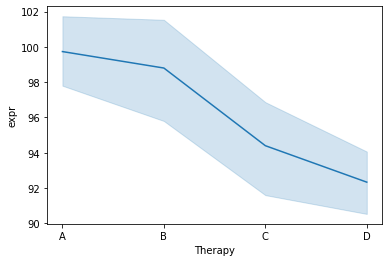

In [11]:
sns.lineplot(x='Therapy', y='expr', data=df)

In [21]:
df.groupby('Therapy')['expr'].std()

Therapy
A    4.165619
B    5.894307
C    5.193402
D    3.735289
Name: expr, dtype: float64

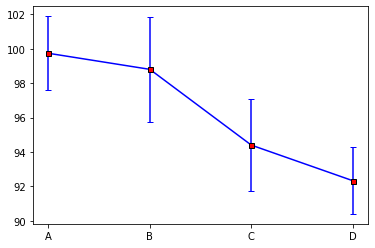

In [32]:
groups = df.groupby('Therapy')['expr']
group_len = groups.apply(len)
group_mean = df.groupby('Therapy')['expr'].mean()
group_std = groups.std() / np.sqrt(group_len)

plt.errorbar(x=group_mean.index,
             y=group_mean,
             yerr=2 * group_std,
             color="blue",
             capsize=3,
             marker="s",
             markersize=5,
             mfc="red",
             mec="black");